In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load the data
def load_data(file_path, nrows=None):
    data = []
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            if nrows is not None and len(data) >= nrows:
                break
            data.append(json.loads(line))
    return pd.DataFrame(data)

file_path = "./yelp_academic_dataset_review.json"
nrows = 100000 # Adjust the number of rows to load based on your computing power
reviews_df = load_data(file_path, nrows)

In [11]:
# Preprocess the data
# Keep only text and stars columns
reviews_df = reviews_df[['text', 'stars']]

# Remove neutral reviews with 3 stars
reviews_df = reviews_df[reviews_df['stars'] != 3]

# Label the reviews as positive (1) if they have 4 or 5 stars, and negative (0) if they have 1 or 2 stars
reviews_df['sentiment'] = reviews_df['stars'].apply(lambda x: 1 if x > 3 else 0)
reviews_df = reviews_df[['text', 'sentiment']]

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews_df['text'], reviews_df['sentiment'], test_size=0.3, random_state=42) 

In [13]:
# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [14]:
# Train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [15]:
# Evaluate the model
y_pred = model.predict(X_test_tfidf)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))


Accuracy:  0.9483679302045728
Confusion Matrix: 
 [[ 4691  1003]
 [  370 20528]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87      5694
           1       0.95      0.98      0.97     20898

    accuracy                           0.95     26592
   macro avg       0.94      0.90      0.92     26592
weighted avg       0.95      0.95      0.95     26592



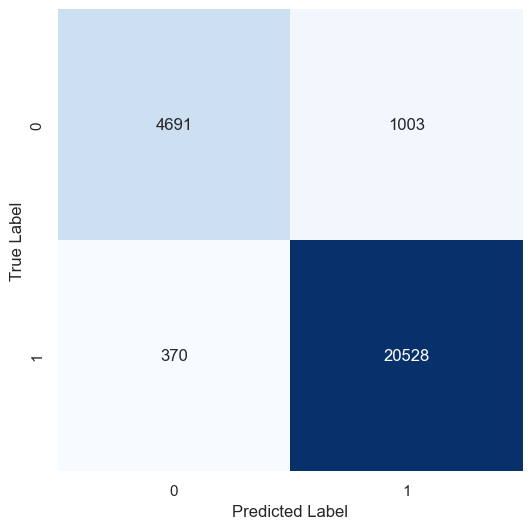

In [16]:
# Visualize the confusion matrix
sns.set(style="whitegrid")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()